In [1]:
import numpy as np
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

In [2]:
# Full model
def model(params, x):
    return params['a'] * np.sin(params['b'] * x + params['c'])

In [3]:
# Generate synthetic data
np.random.seed(42)
x = np.linspace(0, 10, 100)
true_params = {'a': 2.5, 'b': 1.2, 'c': 0.5}  # True values of a, b, c
noise = np.random.normal(0, 0.2, x.size)
y_true = true_params['a'] * np.sin(true_params['b'] * x + true_params['c'])
y_noisy = y_true + noise

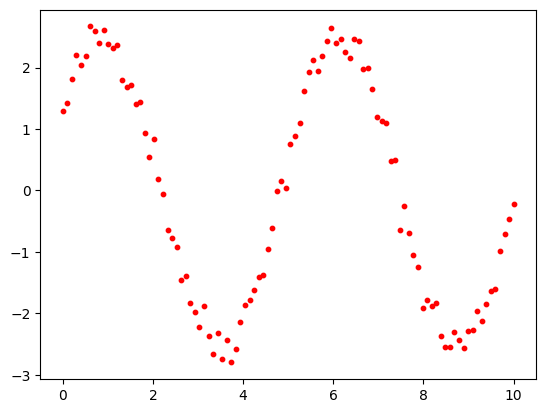

In [4]:
plt.scatter(x, y_noisy, label='Noisy Data', color='red', s=10)

In [5]:
def residuals(params, x, y, fixed_params, fit_flags):
    # Create a copy of the fixed parameters and update with fitted ones
    current_params = fixed_params.copy()
    
    # Update parameters to fit based on the fit_flags
    idx = 0
    for key, flag in fit_flags.items():
        if flag == 1:
            current_params[key] = params[idx]  # Replace fixed values with fitted ones
            idx += 1
    
    # Model: a * sin(b * x + c)
    model_output = current_params['a'] * np.sin(current_params['b'] * x + current_params['c'])
    
    # Residuals: difference between model output and observed data
    residuals = y - model_output
    
    return residuals

In [6]:
# Example: Fix 'b' and optimize 'a' and 'c'
fixed_params = {'a': 1.0, 'b': 1.2, 'c': 1.0}  # Initial guesses
fit_flags = {'a': 1, 'b': 0, 'c': 1}  # 1 = fit, 0 = fixed

# Extract initial guess for the parameters to fit (based on fit_flags)
initial_guess = [fixed_params[key] for key, flag in fit_flags.items() if flag == 1]



In [7]:
initial_guess

[1.0, 1.0]

In [9]:
# Perform the least squares fitting
result = leastsq(residuals, initial_guess, args=(x, y_noisy, fixed_params, fit_flags))


In [10]:

# Use the update() method to modify the fixed_params dictionary with optimized values
fitted_params = fixed_params.copy()
idx = 0
for key, flag in fit_flags.items():
    if flag == 1:
        # Update the fixed_params with the optimized values
        fitted_params.update({key: result[0][idx]})
        idx += 1


In [11]:
# Print results
print("True Parameters: ", true_params)
print("Fitted Parameters: ", fitted_params)
print("Fixed Parameter ('b'): ", fixed_params['b'])


True Parameters:  {'a': 2.5, 'b': 1.2, 'c': 0.5}
Fitted Parameters:  {'a': 2.523283529336858, 'b': 1.2, 'c': 0.5063865585879591}
Fixed Parameter ('b'):  1.2


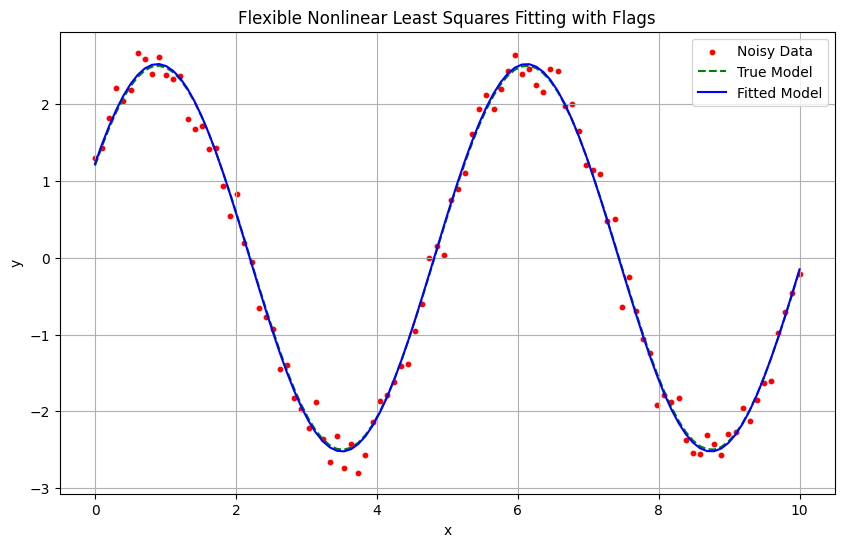

In [12]:

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x, y_noisy, label='Noisy Data', color='red', s=10)
plt.plot(x, y_true, label='True Model', linestyle='--', color='green')
plt.plot(x, model(fitted_params, x), label='Fitted Model', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Flexible Nonlinear Least Squares Fitting with Flags')
plt.legend()
plt.grid()
